# Data Analytics - Co2

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

seaborn   : 0.11.2
numpy     : 1.20.3
plotly    : 5.5.0
pandas    : 1.3.4
watermark : 2.3.0
matplotlib: 3.4.3



In [4]:
# Configuração para os gráficos largura e layout dos graficos
from matplotlib import style 

sns.set_palette("Accent")
style.use('fivethirtyeight')
color = sns.color_palette()

In [5]:
# Carregando a base de dados
data = pd.read_csv("co2_emission.csv")

In [6]:
# Exibido 5 primeiros dados

data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [7]:
# Exibido 5 últimos dados 

data.tail()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88
20852,Zimbabwe,ZWE,2017,10397718.47


In [8]:
# Número de linhas e colunas

data.shape

(20853, 4)

In [10]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n",data.nunique())


Missing values :   2207

Unique values :  
 Entity                              233
Code                                222
Year                                267
Annual CO₂ emissions (tonnes )    13092
dtype: int64


In [11]:
# Verificando informações das variaveis

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


In [12]:
# Exibido tipos de dados

data.dtypes

Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object

In [13]:
# Renomeando colunas

data.columns = ["País", 
                "Código", 
                "Ano", 
                "Co2"]
data.head()

,País,Código,Ano,Co2
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [14]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,20853.0,1.953339e+03,5.790309e+01,1751.0,1932.0,1971.0,1995.00,2.017000e+03
Co2,20853.0,1.930517e+08,1.345143e+09,-625522256.7,318768.0,3828880.0,37068977.48,3.615326e+10


In [15]:
# Estatísticas descritivas
data.describe()

,Ano,Co2
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


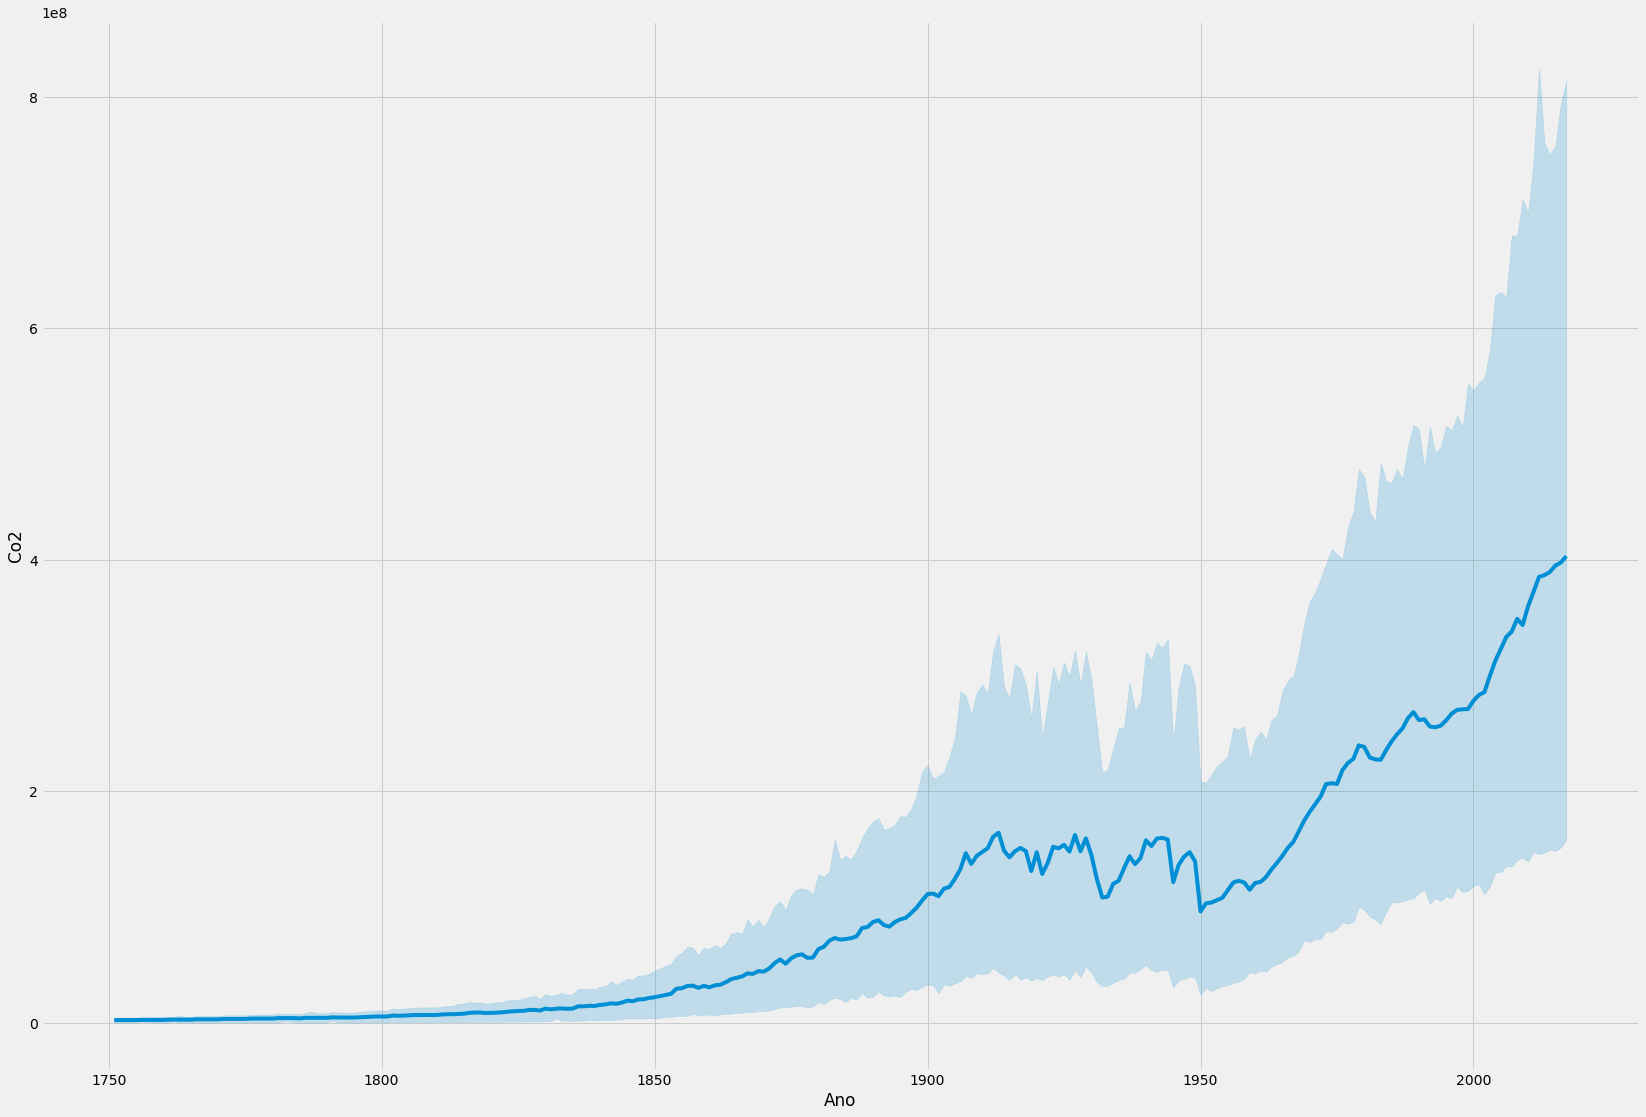

In [16]:
# Gráfico de linear pôr ano
plt.figure(figsize=(25.5, 18))

ax = sns.lineplot(x = "Ano", y="Co2", data = data)

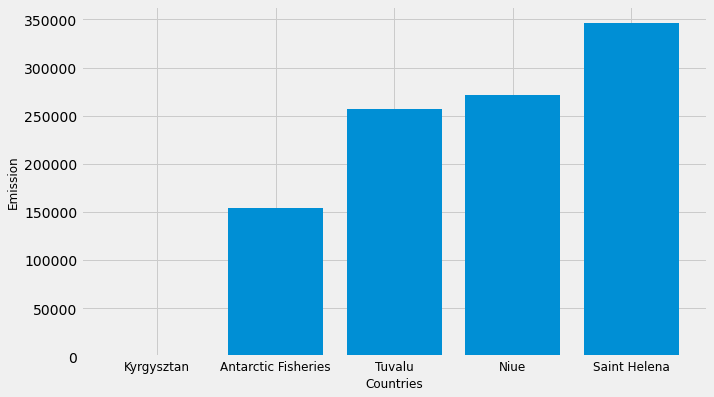

In [17]:
# Gráfico dos país poluentes

def grafico_1(data):
    fig = plt.figure(figsize=(10,6))
    y = data.groupby(['País']).sum().sort_values('Co2')['Co2'][1:6]
    lab =[y.index[i] for i in range(len(y))]
    x =[1,2,3,4,5]
    plt.bar(x,y)
    plt.xticks(x,lab,fontsize=12)
    plt.xlabel('Countries',fontsize=12)
    plt.ylabel('Emission',fontsize=12)
    plt.show()
grafico_1(data)    

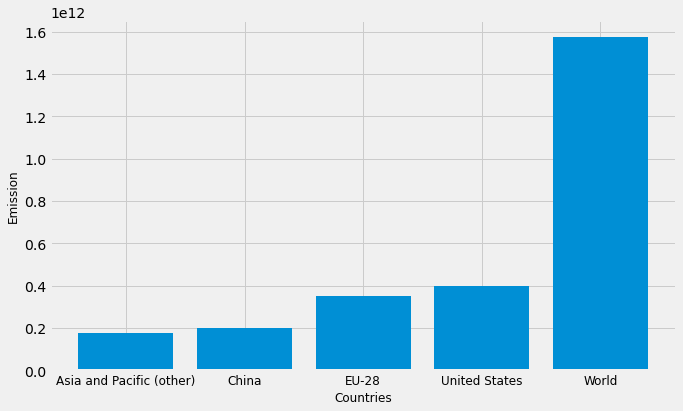

In [19]:
# Continentes emissão Co2
def grafico_2(data):
    
    fig = plt.figure(figsize=(10,6))
    y = data.groupby(['País']).sum().sort_values('Co2')['Co2'][-5:]
    lab =[y.index[i] for i in range(len(y))]
    x =[1,2,3,4,5]
    plt.bar(x,y)
    plt.xticks(x,lab,fontsize=12)
    plt.xlabel('Countries',fontsize=12)
    plt.ylabel('Emission',fontsize=12)
    plt.show()
grafico_2(data)

# Série temporal

In [21]:
# Transformando para série temporal
df = data[data["País"] != "Total"]
df["Ano"] = pd.to_datetime(data["Ano"]).dt.date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   País    20853 non-null  object 
 1   Código  18646 non-null  object 
 2   Ano     20853 non-null  int64  
 3   Co2     20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


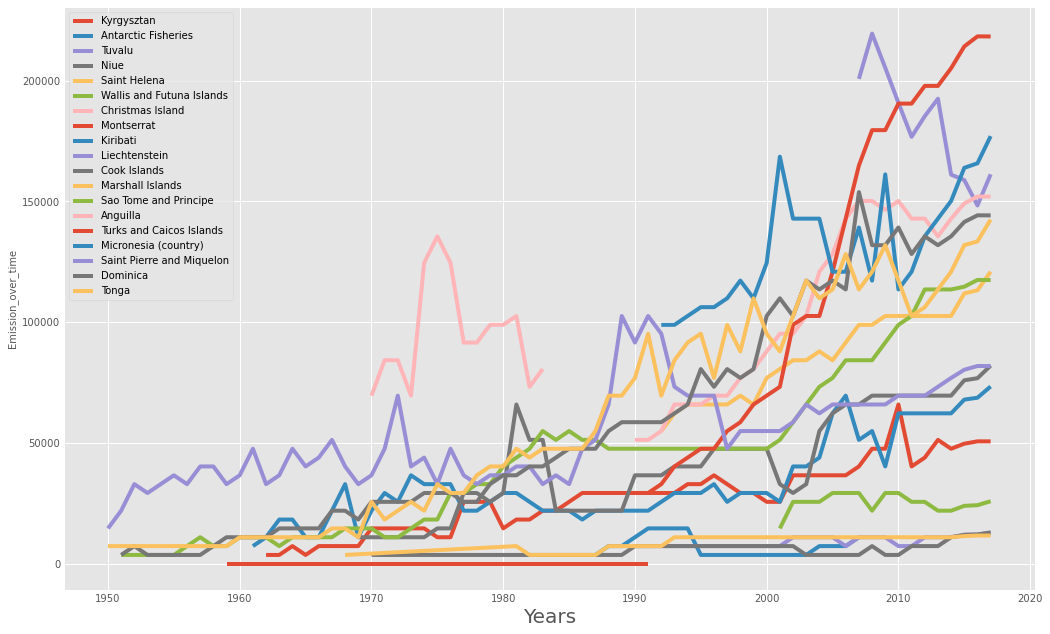

In [22]:
# Gráfico de série temporal
def grafico_3(data):
    style.use('ggplot')
    fig = plt.figure(figsize=(15.5, 10))
    y = data.groupby(['País']).sum().sort_values('Co2')['Co2'][1:20]
    lab =[y.index[i] for i in range(len(y))]

    for i in range(len(lab)):       
        abc=data.groupby(['País','Ano']).mean().loc[lab[i]]
        plt.plot(abc.index,abc['Co2'])

    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Emission_over_time',fontsize=10)
    plt.legend(lab)
grafico_3(data)